In [1]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta, date
import operator

from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#from keras.models import Model
from keras.models import Sequential, model_from_json, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Merge, LSTM
from keras.layers import Input, BatchNormalization, GlobalMaxPooling2D
from keras.layers.merge import Concatenate
from keras.utils import np_utils, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from keras.optimizers import Adam
from keras import optimizers
from keras.layers.advanced_activations import PReLU

from keras import backend

from scipy.sparse import csr_matrix, hstack

C:\Users\Kohei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
data_path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/02_data/02_19a/'
path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/06_keras/06_19ac/'
ver = '06_19ac_keras'

In [3]:
ID = ['air_store_id','visit_date','flag']
TARGET='visitors'

In [4]:
def RMSLE(y, pred):
    return mean_squared_error(y, pred) ** 0.5

In [6]:
train = pd.read_csv(os.path.join(data_path, 'train2.csv'))

In [16]:
# Variable Selection
cols2 = ['holiday_flg','holiday_flg+1d','holiday_flg-1d','holiday_flg_rev',\
        'dow',\
#          'month',\
#             'dow_0',
        'dow_1','dow_2','dow_3','dow_4','dow_5','dow_6',\
#             'month_1',
        'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12',\
        'air_genre',\
        'latitude','longitude',\
#             'var_max_lat','var_max_long',\
#             'km_latlong',\
        'air_areaL1_lbl',\
        'air_areaL2_lbl',\
#         'air_areaL3_lbl',\
#             'km_latlong_0',\
        'km_latlong_1','km_latlong_2','km_latlong_3','km_latlong_4','km_latlong_5',\
        'km_latlong_6','km_latlong_7','km_latlong_8','km_latlong_9','km_latlong_10','km_latlong_11',\
#             'air_genre_0','air_genre_1','air_genre_2','air_genre_3','air_genre_4','air_genre_5','air_genre_6','air_genre_7',\
#             'air_genre_8','air_genre_9','air_genre_10','air_genre_11','air_genre_12','air_genre_13',\
#             'km_hpg_latlong',\
        'days_from_first_date',\
        'dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
#         'dow_all_cnt',\
        'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
        'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
        'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
#             'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med','dowhol_rev_all_cnt',\
#             'dowhol_all_med',\
#             'dowhol+1d_all_med',\
#             'dowhol-1d_all_med',\
#         'dowhol_all_cnt',\
#             'dowhol+1d_all_cnt',\
#             'dowhol-1d_all_cnt',\
#             'km_latlong_mean','km_latlong_dow_mean',\
        'genre_mean',\
#          'genre_dow_mean',\
#         'areaL1_mean',\
#         'areaL1_dow_mean',\
#         'areaL2_mean',\
#         'areaL2_dow_mean',\
        'areaL3_mean',\
#         'areaL3_dow_mean',\
        'res_ttl','res_cnt','res_mean',\
        'res_hr_std',\
#         'res_std',\
#         'res_hr_dif_sum',\
#         'res_hr_dif_mean',\
        'res_ttl_dow_mean','res_cnt_dow_mean',\
#         'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d',\
        'lag_10d','lag_15d','lag_20d','lag_25d','lag_30d','lag_35d','lag_40d','lag_45d','lag_50d',\
         
        'lag_res_1d','lag_res_2d','lag_res_3d','lag_res_4d','lag_res_5d','lag_res_6d',\
#         'lag_res_10d','lag_res_15d','lag_res_20d',\
#         'lag_res_25d','lag_res_30d','lag_res_35d','lag_res_40d','lag_res_45d','lag_res_50d',\
        'lag_1w',\
        'lag_2w',\
        'lag_3w',\
        'lag_4w',\
        'lag_5w',\
        'lag_6w',\
        'lag_7w',\
        'lag_8w',\
        'lag_9w',\
        'lag_10w',\
        'lag_11w',\
        'lag_12w',\
        'lag_13w',\
        'lag_14w',\
        'lag_15w',\
        'lag_16w',\
        'lag_17w',\
        'lag_18w',\
        'lag_19w',\
        'lag_20w',\
        'lag_res_1w','lag_res_2w','lag_res_3w','lag_res_4w','lag_res_5w',\
        'lag_res_6w','lag_res_7w','lag_res_8w','lag_res_9w','lag_res_10w',\
#         'lag_res_11w','lag_res_12w','lag_res_13w','lag_res_14w','lag_res_15w',\
#         'lag_res_16w','lag_res_17w','lag_res_18w','lag_res_19w','lag_res_20w',\
        'mean_3d','max_3d','min_3d','std_3d',\
        'mean_7d','max_7d','min_7d','std_7d',\
        'mean_14d','max_14d','min_14d','std_14d',\
#         'mean_21d','max_21d','min_21d','std_21d',\
        'mean_28d','max_28d','min_28d','std_28d',\
#         'mean_35d','max_35d','min_35d','std_35d',\
        'mean_42d','max_42d','min_42d','std_42d',\
#             'mean_49d','max_49d','min_49d','std_49d',\
        'mean_56d','max_56d','min_56d','std_56d',\
#             'mean_63d','max_63d','min_63d','std_63d',\
#         'mean_70d','max_70d','min_70d','std_70d',\
#             'mean_77d','max_77d','min_77d','std_77d',\
        'mean_84d','max_84d','min_84d','std_84d',\
#             'scale_to_maxmin_3d','scale_to_std_3d',\
        'scale_to_maxmin_7d','scale_to_std_7d',\
        'scale_to_maxmin_14d','scale_to_std_14d',\
#             'scale_to_maxmin_21d','scale_to_std_21d',\
        'scale_to_maxmin_28d','scale_to_std_28d',\
#             'scale_to_maxmin_35d','scale_to_std_35d',\
#             'scale_to_maxmin_42d','scale_to_std_42d',\
#             'scale_to_maxmin_49d','scale_to_std_49d',\
        'scale_to_maxmin_56d','scale_to_std_56d',\
#             'scale_to_maxmin_63d','scale_to_std_63d',\
#             'scale_to_maxmin_70d','scale_to_std_70d',\
#             'scale_to_maxmin_77d','scale_to_std_77d',\
        'scale_to_maxmin_84d','scale_to_std_84d',\
#             'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
#             'mean_28d-56d','mean_28d-84d','mean_56d-84d',\
        'mean_dow_2w','max_dow_2w','min_dow_2w','std_dow_2w',\
#         'mean_dow_3w','max_dow_3w','min_dow_3w','std_dow_3w',\
        'mean_dow_4w','max_dow_4w','min_dow_4w','std_dow_4w',\
#             'mean_dow_5w','max_dow_5w','min_dow_5w','std_dow_5w',\
        'mean_dow_6w','max_dow_6w','min_dow_6w','std_dow_6w',\
#             'mean_dow_7w','max_dow_7w','min_dow_7w','std_dow_7w',\
#         'mean_dow_8w','max_dow_8w','min_dow_8w','std_dow_8w',\
#             'mean_dow_9w','max_dow_9w','min_dow_9w','std_dow_9w',\
#             'mean_dow_10w','max_dow_10w','min_dow_10w','std_dow_10w',\
#             'mean_dow_2w-4w','mean_dow_2w-6w','mean_dow_2w-8w','mean_dow_2w-10w',\
#         'mean_dow_4w-6w','mean_dow_4w-8w','mean_dow_4w-10w',\
#         'mean_dow_6w-8w','mean_dow_6w-10w','mean_dow_8w-10w',\
        'rainfall','snowfall','wind_max',\
        'weather_daytime',\
        'weather_nighttime',\
#             'weather_daytime2','weather_nighttime2',\
        'weather_daytime_0',\
        'weather_daytime_1',\
#         'weather_daytime_2',\
        'weather_daytime_3',\
        'weather_nighttime_0',\
        'weather_nighttime_1',\
        'weather_nighttime_2',\
        'weather_nighttime_3',\
#         'wind_max_inst',\
#         'rainfall_max1h',\
#         'wind_avg',\
        'temperature_high','temperature_low','temperature_avg',\
#         'snowfall_max',\
#         'humidity_avg',\
#         'daylight_hr',\
#         'na_cnt'
        ]
# add = [c for c in train.columns if "air_areaL1_lbl_" in c]
# cols.extend(add)
# add = [c for c in train.columns if "air_areaL2_lbl_" in c]
# cols.extend(add)
add = [c for c in train.columns if "air_areaL3_lbl_" in c]
cols2.extend(add)

cols1 = cols2.copy()
lag = ['lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d']
cols1.extend(lag)

In [11]:
cols_adj = ['dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
            'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
            'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
            'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
            'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med',\
            'km_latlong_mean','km_latlong_dow_mean',\
            'genre_mean','genre_dow_mean',\
            'areaL1_mean','areaL1_dow_mean',\
            'areaL2_mean','areaL2_dow_mean',\
            'areaL3_mean','areaL3_dow_mean',\
            'mean_3d','max_3d','min_3d','std_3d','scale_to_maxmin_3d','scale_to_std_3d',\
            'mean_7d','max_7d','min_7d','std_7d','scale_to_maxmin_7d','scale_to_std_7d',\
            'mean_14d','max_14d','min_14d','std_14d','scale_to_maxmin_14d','scale_to_std_14d',\
            'mean_21d','max_21d','min_21d','std_21d','scale_to_maxmin_21d','scale_to_std_21d',\
            'mean_28d','max_28d','min_28d','std_28d','scale_to_maxmin_28d','scale_to_std_28d',\
            'mean_35d','max_35d','min_35d','std_35d','scale_to_maxmin_35d','scale_to_std_35d',\
            'mean_42d','max_42d','min_42d','std_42d','scale_to_maxmin_42d','scale_to_std_42d',\
            'mean_49d','max_49d','min_49d','std_49d','scale_to_maxmin_49d','scale_to_std_49d',\
            'mean_56d','max_56d','min_56d','std_56d','scale_to_maxmin_56d','scale_to_std_56d',\
            'mean_63d','max_63d','min_63d','std_63d','scale_to_maxmin_63d','scale_to_std_63d',\
            'mean_70d','max_70d','min_70d','std_70d','scale_to_maxmin_70d','scale_to_std_70d',\
            'mean_77d','max_77d','min_77d','std_77d','scale_to_maxmin_77d','scale_to_std_77d',\
            'mean_84d','max_84d','min_84d','std_84d','scale_to_maxmin_84d','scale_to_std_84d',\
            'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
            'mean_28d-56d','mean_28d-84d','mean_56d-84d']
cols_remove = ['dow_all_cnt','dowhol_all_cnt','dowhol+1d_all_cnt','dowhol-1d_all_cnt','dowhol_rev_all_cnt',
               'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d']
cols_inf = ['scale_to_maxmin_3d','scale_to_std_3d',\
            'scale_to_maxmin_7d','scale_to_std_7d',\
            'scale_to_maxmin_14d','scale_to_std_14d',\
            'scale_to_maxmin_21d','scale_to_std_21d',\
            'scale_to_maxmin_28d','scale_to_std_28d',\
            'scale_to_maxmin_35d','scale_to_std_35d',\
            'scale_to_maxmin_42d','scale_to_std_42d',\
            'scale_to_maxmin_49d','scale_to_std_49d',\
            'scale_to_maxmin_56d','scale_to_std_56d',\
            'scale_to_maxmin_63d','scale_to_std_63d',\
            'scale_to_maxmin_70d','scale_to_std_70d',\
            'scale_to_maxmin_77d','scale_to_std_77d',\
            'scale_to_maxmin_84d','scale_to_std_84d']

In [21]:
def model_run(df):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    y_train = np.log1p(train['visitors'])
    id_train = train[ID]
    id_test  = test[ID]
    x_train = train
    x_test = test
    x_train.drop(ID, axis=1, inplace=True)
    x_train.drop(TARGET, axis=1, inplace=True)
    x_test.drop(ID, axis=1, inplace=True)
    del train, test
    
    tr_te = pd.concat([x_train,x_test])
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,tr_te[x].median())
        tr_te[x] = tr_te[x].replace(np.inf,tr_te[x].median())
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
        
    ntrain = x_train.shape[0]
    x_train = tr_te[:ntrain]
    x_test  = tr_te[ntrain:]

    if df=='train1':
        x_train = x_train[cols1]
        x_test = x_test[cols1]
    elif df=='train2':
        x_train = x_train[cols2]
        x_test = x_test[cols2]
    
    x_train['wind_max_x_rainfall'] = x_train['wind_max']*x_train['rainfall'] 
    x_test['wind_max_x_rainfall']  = x_test['wind_max']*x_test['rainfall']
    
    x_train = x_train.replace(-1,0) 
    x_test  = x_test.replace(-1,0)
    
    x_train = np.array(x_train)
    x_test  = np.array(x_test)
    
    x_test  = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
    
    n_folds = 5
    bagging = 1
    divisor = 1
    cv_sum = 0
    pred_tr_all = []
    pred_te_all = []

    kf = KFold(x_train.shape[0], n_folds=n_folds, random_state=1234, shuffle=True)

    # parameters
    batch_size = 20000
    epochs = 500

    for i, (tr_index,vl_index) in enumerate(kf):
        print('\nFold %d / %d' % (i+1, n_folds))
        pred = []
        pred_vl = []

        x_tr, x_vl = x_train[tr_index], x_train[vl_index]
        y_tr, y_vl = y_train.iloc[tr_index], y_train.iloc[vl_index]
        id_vl      = id_train.iloc[vl_index,:]
        
        x_tr = x_tr.reshape((x_tr.shape[0], 1, x_tr.shape[1]))
        x_vl = x_vl.reshape((x_vl.shape[0], 1, x_vl.shape[1]))
        

        for j in range(1,bagging+1):
            print('\nBagging %d / %d' % (j, bagging))

            # sampling
#             np.random.seed(j)
#             sample = np.random.choice(len(x_tr), size=int(len(x_tr)/divisor))
#             x_tr_bag = x_tr.iloc[sample]
#             y_tr_bag = y_tr.iloc[sample]
            x_tr_bag = x_tr
            y_tr_bag = y_tr
            y_mean   = y_tr_bag.mean() 

            # model architect
            model = Sequential()
            model.add(LSTM(128, input_shape=(x_tr.shape[1],x_tr.shape[2])))
            model.add(BatchNormalization())
            model.add(Dropout(.2))

            model.add(Dense(64))
            model.add(PReLU())
            model.add(BatchNormalization())
            model.add(Dropout(.05))

            model.add(Dense(32))
            model.add(PReLU())
            model.add(BatchNormalization())
            model.add(Dropout(.05))

            model.add(Dense(16))
            model.add(PReLU())
            model.add(BatchNormalization())
            model.add(Dropout(.05))

            model.add(Dense(1))
            opt = optimizers.Adam(lr=0.001)
            model.compile(loss='mse', optimizer=opt)
            
            
            MODEL_FILE = 'keras_k{}_wght.hdf5'.format(i+1)
            callbacks = [
                        ModelCheckpoint(MODEL_FILE, save_best_only=True, monitor='val_loss', mode='min'),
                        EarlyStopping(monitor='val_loss', patience=10, verbose=0),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')
                        ]
            
            model.fit(x_tr, y_tr-y_mean,
#             model.fit(x_tr, y_tr,
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = 1,
                      validation_data=(x_vl, y_vl-y_mean),callbacks = callbacks)
#                       validation_data=(x_vl, y_vl),callbacks = callbacks)

            if j==1:
                pred_v = model.predict(x_vl, verbose=0)[:,0]+y_mean
                pred_t = model.predict(x_test, verbose=0)[:,0]+y_mean
#                 pred_v = model.predict(x_vl, verbose=0)[:,0]
#                 pred_t = model.predict(x_test, verbose=0)[:,0]
            else:
                pred_v += model.predict(x_vl, verbose=0)[:,0]+y_mean
                pred_t += model.predict(x_test, verbose=0)[:,0]+y_mean 
#                 pred_v += model.predict(x_vl, verbose=0)[:,0]
#                 pred_t += model.predict(x_test, verbose=0)[:,0] 
            pred_vl = (pred_v/j)
            pred_te = (pred_t/j)

            cv_score = RMSLE(y_vl, pred_vl)
            print('Fold RMSLE : %.6f' % cv_score)

        # end of bagging
        pred = id_vl
        pred['pred'] = pred_vl

        if i==0:
            pred_tr_all = pred
            pred_te_all = pred_te
        else:
            pred_tr_all = pd.concat([pred_tr_all,pred])
            pred_te_all += pred_te

        cv_sum = cv_sum + cv_score

    pred_te_all /= n_folds
    pred_te_all = pd.DataFrame({'pred':pred_te_all})
    pred_te_all = pd.concat([id_test,pred_te_all],axis=1)

    print('CV RMSLE : %.6f' % (cv_sum / n_folds))

    return pred_tr_all, pred_te_all

In [22]:
pred_tr1, pred_te1 = model_run('train1')
pred_tr1.to_csv(path+'/'+ver+'_pred_tr1.csv', index=False)
pred_te1.to_csv(path+'/'+ver+'_pred_te1.csv', index=False)


Fold 1 / 5

Bagging 1 / 1
Train on 185082 samples, validate on 46271 samples
Epoch 1/500
185082/185082 [==============================] - 6s - loss: 1.6251 - val_loss: 0.6566
Epoch 2/500
185082/185082 [==============================] - 4s - loss: 0.7876 - val_loss: 0.5949
Epoch 3/500
185082/185082 [==============================] - 4s - loss: 0.6119 - val_loss: 0.5647
Epoch 4/500
185082/185082 [==============================] - 5s - loss: 0.5403 - val_loss: 0.5426
Epoch 5/500
185082/185082 [==============================] - 4s - loss: 0.5058 - val_loss: 0.5177
Epoch 6/500
185082/185082 [==============================] - 5s - loss: 0.4810 - val_loss: 0.5039
Epoch 7/500
185082/185082 [==============================] - 4s - loss: 0.4570 - val_loss: 0.4884
Epoch 8/500
185082/185082 [==============================] - 5s - loss: 0.4454 - val_loss: 0.4801
Epoch 9/500
185082/185082 [==============================] - 5s - loss: 0.4311 - val_loss: 0.4618
Epoch 10/500
185082/185082 [============

185082/185082 [==============================] - 4s - loss: 0.2816 - val_loss: 0.2621
Epoch 82/500
185082/185082 [==============================] - 4s - loss: 0.2807 - val_loss: 0.2613
Epoch 83/500
185082/185082 [==============================] - 4s - loss: 0.2803 - val_loss: 0.2611
Epoch 84/500
185082/185082 [==============================] - 4s - loss: 0.2806 - val_loss: 0.2613
Epoch 85/500
185082/185082 [==============================] - 4s - loss: 0.2819 - val_loss: 0.2613
Epoch 86/500
185082/185082 [==============================] - 4s - loss: 0.2798 - val_loss: 0.2609
Epoch 87/500
185082/185082 [==============================] - 4s - loss: 0.2796 - val_loss: 0.2611
Epoch 88/500
185082/185082 [==============================] - 4s - loss: 0.2806 - val_loss: 0.2607
Epoch 89/500
185082/185082 [==============================] - 4s - loss: 0.2803 - val_loss: 0.2603
Epoch 90/500
185082/185082 [==============================] - 4s - loss: 0.2793 - val_loss: 0.2606
Epoch 91/500
185082/185

C:\Users\Kohei\Anaconda3\lib\site-packages\ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Bagging 1 / 1
Train on 185082 samples, validate on 46271 samples
Epoch 1/500
185082/185082 [==============================] - 6s - loss: 1.4302 - val_loss: 0.6186
Epoch 2/500
185082/185082 [==============================] - 5s - loss: 0.7501 - val_loss: 0.6151
Epoch 3/500
185082/185082 [==============================] - 5s - loss: 0.5964 - val_loss: 0.5878
Epoch 4/500
185082/185082 [==============================] - 4s - loss: 0.5268 - val_loss: 0.5626
Epoch 5/500
185082/185082 [==============================] - 4s - loss: 0.4907 - val_loss: 0.5420
Epoch 6/500
185082/185082 [==============================] - 5s - loss: 0.4661 - val_loss: 0.5278
Epoch 7/500
185082/185082 [==============================] - 4s - loss: 0.4468 - val_loss: 0.5101
Epoch 8/500
185082/185082 [==============================] - 4s - loss: 0.4376 - val_loss: 0.4919
Epoch 9/500
185082/185082 [==============================] - 4s - loss: 0.4203 - val_loss: 0.4727
Epoch 10/500
185082/185082 [========================

185082/185082 [==============================] - 4s - loss: 0.2777 - val_loss: 0.2674
Epoch 82/500
185082/185082 [==============================] - 4s - loss: 0.2782 - val_loss: 0.2672
Epoch 83/500
185082/185082 [==============================] - 4s - loss: 0.2769 - val_loss: 0.2670
Epoch 84/500
185082/185082 [==============================] - 4s - loss: 0.2776 - val_loss: 0.2673
Epoch 85/500
185082/185082 [==============================] - 4s - loss: 0.2766 - val_loss: 0.2672
Epoch 86/500
185082/185082 [==============================] - 4s - loss: 0.2778 - val_loss: 0.2670
Epoch 87/500
185082/185082 [==============================] - 4s - loss: 0.2775 - val_loss: 0.2671
Epoch 88/500
185082/185082 [==============================] - 4s - loss: 0.2782 - val_loss: 0.2671
Epoch 89/500
180000/185082 [============================>.] - ETA: 0s - loss: 0.2773
Epoch 00088: reducing learning rate to 1.0000000474974514e-05.
185082/185082 [==============================] - 4s - loss: 0.2769 - val_

185082/185082 [==============================] - 4s - loss: 0.2777 - val_loss: 0.2666
Epoch 150/500
180000/185082 [============================>.] - ETA: 0s - loss: 0.2778
Epoch 00149: reducing learning rate to 1.0000001518582595e-15.
185082/185082 [==============================] - 4s - loss: 0.2777 - val_loss: 0.2666
Epoch 151/500
185082/185082 [==============================] - 4s - loss: 0.2769 - val_loss: 0.2666
Epoch 152/500
185082/185082 [==============================] - 4s - loss: 0.2762 - val_loss: 0.2666
Epoch 153/500
185082/185082 [==============================] - 4s - loss: 0.2774 - val_loss: 0.2666
Fold RMSLE : 0.516327

Fold 3 / 5

Bagging 1 / 1
Train on 185082 samples, validate on 46271 samples
Epoch 1/500
185082/185082 [==============================] - 6s - loss: 1.6214 - val_loss: 0.6188
Epoch 2/500
185082/185082 [==============================] - 4s - loss: 0.8231 - val_loss: 0.6421
Epoch 3/500
185082/185082 [==============================] - 4s - loss: 0.6424 - va

185082/185082 [==============================] - 4s - loss: 0.2843 - val_loss: 0.2625
Epoch 77/500
185082/185082 [==============================] - 4s - loss: 0.2828 - val_loss: 0.2628
Epoch 78/500
185082/185082 [==============================] - 4s - loss: 0.2847 - val_loss: 0.2620
Epoch 79/500
185082/185082 [==============================] - 4s - loss: 0.2822 - val_loss: 0.2629
Epoch 80/500
185082/185082 [==============================] - 4s - loss: 0.2814 - val_loss: 0.2618
Epoch 81/500
185082/185082 [==============================] - 5s - loss: 0.2811 - val_loss: 0.2616
Epoch 82/500
185082/185082 [==============================] - 4s - loss: 0.2808 - val_loss: 0.2616
Epoch 83/500
185082/185082 [==============================] - 4s - loss: 0.2802 - val_loss: 0.2609
Epoch 84/500
185082/185082 [==============================] - 4s - loss: 0.2791 - val_loss: 0.2635
Epoch 85/500
185082/185082 [==============================] - 4s - loss: 0.2796 - val_loss: 0.2609
Epoch 86/500
185082/185

185083/185083 [==============================] - 5s - loss: 0.3057 - val_loss: 0.2737
Epoch 41/500
185083/185083 [==============================] - 4s - loss: 0.3026 - val_loss: 0.2741
Epoch 42/500
185083/185083 [==============================] - 5s - loss: 0.3023 - val_loss: 0.2712
Epoch 43/500
185083/185083 [==============================] - 4s - loss: 0.3018 - val_loss: 0.2714
Epoch 44/500
185083/185083 [==============================] - 5s - loss: 0.3004 - val_loss: 0.2697
Epoch 45/500
185083/185083 [==============================] - 5s - loss: 0.2995 - val_loss: 0.2678
Epoch 46/500
185083/185083 [==============================] - 5s - loss: 0.2983 - val_loss: 0.2665
Epoch 47/500
185083/185083 [==============================] - 4s - loss: 0.2977 - val_loss: 0.2668
Epoch 48/500
185083/185083 [==============================] - 5s - loss: 0.2946 - val_loss: 0.2642
Epoch 49/500
185083/185083 [==============================] - 4s - loss: 0.2947 - val_loss: 0.2648
Epoch 50/500
185083/185

180000/185083 [============================>.] - ETA: 0s - loss: 0.2754
Epoch 00117: reducing learning rate to 1.0000001111620805e-07.
185083/185083 [==============================] - 4s - loss: 0.2754 - val_loss: 0.2570
Epoch 119/500
185083/185083 [==============================] - 4s - loss: 0.2753 - val_loss: 0.2570
Epoch 120/500
185083/185083 [==============================] - 5s - loss: 0.2755 - val_loss: 0.2570
Epoch 121/500
185083/185083 [==============================] - 5s - loss: 0.2751 - val_loss: 0.2570
Epoch 122/500
185083/185083 [==============================] - 5s - loss: 0.2757 - val_loss: 0.2570
Epoch 123/500
180000/185083 [============================>.] - ETA: 0s - loss: 0.2753
Epoch 00122: reducing learning rate to 1.000000082740371e-08.
185083/185083 [==============================] - 4s - loss: 0.2754 - val_loss: 0.2570
Epoch 124/500
185083/185083 [==============================] - 4s - loss: 0.2755 - val_loss: 0.2570
Epoch 125/500
185083/185083 [================

185083/185083 [==============================] - 4s - loss: 0.2953 - val_loss: 0.2672
Epoch 55/500
185083/185083 [==============================] - 4s - loss: 0.2935 - val_loss: 0.2673
Epoch 56/500
185083/185083 [==============================] - 5s - loss: 0.2938 - val_loss: 0.2669
Epoch 57/500
185083/185083 [==============================] - 4s - loss: 0.2921 - val_loss: 0.2686
Epoch 58/500
185083/185083 [==============================] - 5s - loss: 0.2906 - val_loss: 0.2659
Epoch 59/500
185083/185083 [==============================] - 5s - loss: 0.2897 - val_loss: 0.2688
Epoch 60/500
185083/185083 [==============================] - 4s - loss: 0.2886 - val_loss: 0.2674
Epoch 61/500
185083/185083 [==============================] - 5s - loss: 0.2891 - val_loss: 0.2650
Epoch 62/500
185083/185083 [==============================] - 4s - loss: 0.2881 - val_loss: 0.2667
Epoch 63/500
185083/185083 [==============================] - 4s - loss: 0.2873 - val_loss: 0.2647
Epoch 64/500
185083/185

185083/185083 [==============================] - 5s - loss: 0.2732 - val_loss: 0.2605
Epoch 130/500
185083/185083 [==============================] - 5s - loss: 0.2729 - val_loss: 0.2605
Epoch 131/500
185083/185083 [==============================] - 5s - loss: 0.2729 - val_loss: 0.2605
Epoch 132/500
185083/185083 [==============================] - 5s - loss: 0.2730 - val_loss: 0.2605
Epoch 133/500
185083/185083 [==============================] - 4s - loss: 0.2729 - val_loss: 0.2605
Epoch 134/500
185083/185083 [==============================] - 4s - loss: 0.2729 - val_loss: 0.2605
Epoch 135/500
185083/185083 [==============================] - 4s - loss: 0.2733 - val_loss: 0.2605
Epoch 136/500
185083/185083 [==============================] - 4s - loss: 0.2740 - val_loss: 0.2605
Epoch 137/500
185083/185083 [==============================] - 4s - loss: 0.2735 - val_loss: 0.2605
Epoch 138/500
180000/185083 [============================>.] - ETA: 0s - loss: 0.2732
Epoch 00137: reducing learni

In [23]:
pred_tr2, pred_te2 = model_run('train2')
pred_tr2.to_csv(path+'/'+ver+'_pred_tr2.csv', index=False)
pred_te2.to_csv(path+'/'+ver+'_pred_te2.csv', index=False)


Fold 1 / 5

Bagging 1 / 1
Train on 185082 samples, validate on 46271 samples
Epoch 1/500
185082/185082 [==============================] - 7s - loss: 1.3266 - val_loss: 0.6152
Epoch 2/500
185082/185082 [==============================] - 4s - loss: 0.7332 - val_loss: 0.5914
Epoch 3/500
185082/185082 [==============================] - 4s - loss: 0.6023 - val_loss: 0.5642
Epoch 4/500
185082/185082 [==============================] - 5s - loss: 0.5465 - val_loss: 0.5357
Epoch 5/500
185082/185082 [==============================] - 4s - loss: 0.5109 - val_loss: 0.5043
Epoch 6/500
185082/185082 [==============================] - 5s - loss: 0.4883 - val_loss: 0.4837
Epoch 7/500
185082/185082 [==============================] - 4s - loss: 0.4709 - val_loss: 0.4670
Epoch 8/500
185082/185082 [==============================] - 5s - loss: 0.4549 - val_loss: 0.4536
Epoch 9/500
185082/185082 [==============================] - 4s - loss: 0.4462 - val_loss: 0.4400
Epoch 10/500
185082/185082 [============

185082/185082 [==============================] - 4s - loss: 0.3056 - val_loss: 0.2911
Epoch 84/500
185082/185082 [==============================] - 4s - loss: 0.3050 - val_loss: 0.2974
Epoch 85/500
185082/185082 [==============================] - 5s - loss: 0.3040 - val_loss: 0.2890
Epoch 86/500
185082/185082 [==============================] - 4s - loss: 0.3037 - val_loss: 0.2890
Epoch 87/500
185082/185082 [==============================] - 4s - loss: 0.3036 - val_loss: 0.2949
Epoch 88/500
185082/185082 [==============================] - 4s - loss: 0.3035 - val_loss: 0.2894
Epoch 89/500
185082/185082 [==============================] - 4s - loss: 0.3029 - val_loss: 0.2886
Epoch 90/500
185082/185082 [==============================] - 4s - loss: 0.3024 - val_loss: 0.2889
Epoch 91/500
185082/185082 [==============================] - 4s - loss: 0.3012 - val_loss: 0.2881
Epoch 92/500
185082/185082 [==============================] - 4s - loss: 0.3021 - val_loss: 0.2886
Epoch 93/500
185082/185

C:\Users\Kohei\Anaconda3\lib\site-packages\ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Bagging 1 / 1
Train on 185082 samples, validate on 46271 samples
Epoch 1/500
185082/185082 [==============================] - 7s - loss: 1.3800 - val_loss: 0.6610
Epoch 2/500
185082/185082 [==============================] - 4s - loss: 0.7441 - val_loss: 0.6332
Epoch 3/500
185082/185082 [==============================] - 5s - loss: 0.6093 - val_loss: 0.5981
Epoch 4/500
185082/185082 [==============================] - 4s - loss: 0.5444 - val_loss: 0.5657
Epoch 5/500
185082/185082 [==============================] - 4s - loss: 0.5186 - val_loss: 0.5354
Epoch 6/500
185082/185082 [==============================] - 5s - loss: 0.4919 - val_loss: 0.5108
Epoch 7/500
185082/185082 [==============================] - 4s - loss: 0.4759 - val_loss: 0.4940
Epoch 8/500
185082/185082 [==============================] - 4s - loss: 0.4599 - val_loss: 0.4719
Epoch 9/500
185082/185082 [==============================] - 5s - loss: 0.4508 - val_loss: 0.4597
Epoch 10/500
185082/185082 [========================

185082/185082 [==============================] - 5s - loss: 0.3065 - val_loss: 0.2884
Epoch 82/500
185082/185082 [==============================] - 5s - loss: 0.3067 - val_loss: 0.2879
Epoch 83/500
185082/185082 [==============================] - 4s - loss: 0.3067 - val_loss: 0.2880
Epoch 84/500
185082/185082 [==============================] - 5s - loss: 0.3064 - val_loss: 0.2876
Epoch 85/500
185082/185082 [==============================] - 5s - loss: 0.3056 - val_loss: 0.2876
Epoch 86/500
185082/185082 [==============================] - 4s - loss: 0.3059 - val_loss: 0.2880
Epoch 87/500
185082/185082 [==============================] - 4s - loss: 0.3069 - val_loss: 0.2882
Epoch 88/500
185082/185082 [==============================] - 4s - loss: 0.3068 - val_loss: 0.2880
Epoch 89/500
185082/185082 [==============================] - 4s - loss: 0.3060 - val_loss: 0.2878
Epoch 90/500
185082/185082 [==============================] - 4s - loss: 0.3056 - val_loss: 0.2874
Epoch 91/500
185082/185

180000/185082 [============================>.] - ETA: 0s - loss: 0.3057
Epoch 00151: reducing learning rate to 1.0000001044244145e-13.
185082/185082 [==============================] - 4s - loss: 0.3057 - val_loss: 0.2866
Epoch 153/500
185082/185082 [==============================] - 4s - loss: 0.3042 - val_loss: 0.2866
Fold RMSLE : 0.535318

Fold 3 / 5

Bagging 1 / 1
Train on 185082 samples, validate on 46271 samples
Epoch 1/500
185082/185082 [==============================] - 7s - loss: 1.2292 - val_loss: 0.7096
Epoch 2/500
185082/185082 [==============================] - 4s - loss: 0.6801 - val_loss: 0.7080
Epoch 3/500
185082/185082 [==============================] - 4s - loss: 0.5711 - val_loss: 0.6812
Epoch 4/500
185082/185082 [==============================] - 4s - loss: 0.5208 - val_loss: 0.6500
Epoch 5/500
185082/185082 [==============================] - 4s - loss: 0.4872 - val_loss: 0.6150
Epoch 6/500
185082/185082 [==============================] - 4s - loss: 0.4666 - val_loss

185082/185082 [==============================] - 4s - loss: 0.2979 - val_loss: 0.2978
Epoch 80/500
185082/185082 [==============================] - 4s - loss: 0.2974 - val_loss: 0.2971
Epoch 81/500
185082/185082 [==============================] - 5s - loss: 0.2973 - val_loss: 0.2954
Epoch 82/500
185082/185082 [==============================] - 4s - loss: 0.2963 - val_loss: 0.2997
Epoch 83/500
185082/185082 [==============================] - 4s - loss: 0.2961 - val_loss: 0.2958
Epoch 84/500
185082/185082 [==============================] - 4s - loss: 0.2957 - val_loss: 0.2955
Epoch 85/500
185082/185082 [==============================] - 5s - loss: 0.2962 - val_loss: 0.2952
Epoch 86/500
185082/185082 [==============================] - 4s - loss: 0.2952 - val_loss: 0.3007
Epoch 87/500
185082/185082 [==============================] - 5s - loss: 0.2947 - val_loss: 0.2952
Epoch 88/500
185082/185082 [==============================] - 4s - loss: 0.2943 - val_loss: 0.2953
Epoch 89/500
185082/185

185082/185082 [==============================] - 5s - loss: 0.2859 - val_loss: 0.2912
Epoch 155/500
180000/185082 [============================>.] - ETA: 0s - loss: 0.2856
Epoch 00154: reducing learning rate to 1.000000082740371e-09.
185082/185082 [==============================] - 5s - loss: 0.2863 - val_loss: 0.2912
Epoch 156/500
185082/185082 [==============================] - 5s - loss: 0.2861 - val_loss: 0.2912
Epoch 157/500
185082/185082 [==============================] - 5s - loss: 0.2862 - val_loss: 0.2912
Epoch 158/500
185082/185082 [==============================] - 5s - loss: 0.2867 - val_loss: 0.2912
Epoch 159/500
185082/185082 [==============================] - 4s - loss: 0.2859 - val_loss: 0.2912
Epoch 160/500
180000/185082 [============================>.] - ETA: 0s - loss: 0.2866
Epoch 00159: reducing learning rate to 1.000000082740371e-10.
185082/185082 [==============================] - 5s - loss: 0.2862 - val_loss: 0.2912
Epoch 161/500
185082/185082 [=================

185083/185083 [==============================] - 5s - loss: 0.3747 - val_loss: 0.3669
Epoch 25/500
185083/185083 [==============================] - 5s - loss: 0.3721 - val_loss: 0.3540
Epoch 26/500
185083/185083 [==============================] - 4s - loss: 0.3696 - val_loss: 0.3570
Epoch 27/500
185083/185083 [==============================] - 5s - loss: 0.3668 - val_loss: 0.3511
Epoch 28/500
185083/185083 [==============================] - 9s - loss: 0.3637 - val_loss: 0.3510
Epoch 29/500
185083/185083 [==============================] - 5s - loss: 0.3636 - val_loss: 0.3404
Epoch 30/500
185083/185083 [==============================] - 5s - loss: 0.3602 - val_loss: 0.3409
Epoch 31/500
185083/185083 [==============================] - 5s - loss: 0.3587 - val_loss: 0.3362
Epoch 32/500
185083/185083 [==============================] - 5s - loss: 0.3560 - val_loss: 0.3386
Epoch 33/500
185083/185083 [==============================] - 5s - loss: 0.3541 - val_loss: 0.3321
Epoch 34/500
185083/185

185083/185083 [==============================] - 5s - loss: 0.2988 - val_loss: 0.2903
Epoch 106/500
185083/185083 [==============================] - 4s - loss: 0.2989 - val_loss: 0.2905
Epoch 107/500
185083/185083 [==============================] - 4s - loss: 0.2981 - val_loss: 0.2908
Epoch 108/500
185083/185083 [==============================] - 4s - loss: 0.2986 - val_loss: 0.2904
Epoch 109/500
185083/185083 [==============================] - 4s - loss: 0.2981 - val_loss: 0.2906
Epoch 110/500
185083/185083 [==============================] - 4s - loss: 0.2985 - val_loss: 0.2905
Epoch 111/500
185083/185083 [==============================] - 5s - loss: 0.2979 - val_loss: 0.2899
Epoch 112/500
185083/185083 [==============================] - 4s - loss: 0.2983 - val_loss: 0.2902
Epoch 113/500
185083/185083 [==============================] - 4s - loss: 0.2981 - val_loss: 0.2901
Epoch 114/500
185083/185083 [==============================] - 5s - loss: 0.2982 - val_loss: 0.2898
Epoch 115/500


185083/185083 [==============================] - 4s - loss: 0.2981 - val_loss: 0.2896
Epoch 174/500
185083/185083 [==============================] - 4s - loss: 0.2976 - val_loss: 0.2896
Epoch 175/500
185083/185083 [==============================] - 5s - loss: 0.2976 - val_loss: 0.2896
Epoch 176/500
180000/185083 [============================>.] - ETA: 0s - loss: 0.2973
Epoch 00175: reducing learning rate to 1.0000001518582595e-15.
185083/185083 [==============================] - 4s - loss: 0.2972 - val_loss: 0.2896
Epoch 177/500
185083/185083 [==============================] - 5s - loss: 0.2981 - val_loss: 0.2896
Epoch 178/500
185083/185083 [==============================] - 4s - loss: 0.2979 - val_loss: 0.2896
Epoch 179/500
185083/185083 [==============================] - 5s - loss: 0.2978 - val_loss: 0.2896
Epoch 180/500
185083/185083 [==============================] - 4s - loss: 0.2974 - val_loss: 0.2896
Epoch 181/500
180000/185083 [============================>.] - ETA: 0s - loss: 

185083/185083 [==============================] - 4s - loss: 0.3059 - val_loss: 0.3022
Epoch 61/500
185083/185083 [==============================] - 4s - loss: 0.3053 - val_loss: 0.3047
Epoch 62/500
185083/185083 [==============================] - 5s - loss: 0.3053 - val_loss: 0.2992
Epoch 63/500
185083/185083 [==============================] - 5s - loss: 0.3048 - val_loss: 0.3009
Epoch 64/500
185083/185083 [==============================] - 4s - loss: 0.3042 - val_loss: 0.2999
Epoch 65/500
185083/185083 [==============================] - 4s - loss: 0.3029 - val_loss: 0.2997
Epoch 66/500
185083/185083 [==============================] - 4s - loss: 0.3034 - val_loss: 0.3005
Epoch 67/500
185083/185083 [==============================] - 4s - loss: 0.3027 - val_loss: 0.2995
Epoch 68/500
180000/185083 [============================>.] - ETA: 0s - loss: 0.3019
Epoch 00067: reducing learning rate to 0.00010000000474974513.
185083/185083 [==============================] - 5s - loss: 0.3019 - val_

185083/185083 [==============================] - 4s - loss: 0.3001 - val_loss: 0.2951
Epoch 132/500
185083/185083 [==============================] - 4s - loss: 0.3003 - val_loss: 0.2951
Epoch 133/500
180000/185083 [============================>.] - ETA: 0s - loss: 0.3003
Epoch 00132: reducing learning rate to 1.000000082740371e-12.
185083/185083 [==============================] - 4s - loss: 0.3003 - val_loss: 0.2951
Epoch 134/500
185083/185083 [==============================] - 4s - loss: 0.2997 - val_loss: 0.2951
Fold RMSLE : 0.543213
CV RMSLE : 0.538231


In [24]:
sub = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/sample_submission.csv')
sub['air_store_id'] = sub.id.map(lambda x: '_'.join(x.split('_')[:-1]))
sub['visit_date']   = sub.id.map(lambda x: x.split('_')[2])
sub['visit_date'] = pd.to_datetime(sub['visit_date'])

pred_te = pd.concat([pred_te1,pred_te2])
pred_te['visit_date'] = pd.to_datetime(pred_te['visit_date'])

# submission
sub.loc[:,'visitors'] = sub.merge(pred_te, on=['air_store_id','visit_date'], how='left')['pred'].values
sub['visitors'] = np.expm1(sub['visitors'])
sub_file = path+'/'+ver+'_sub.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

# adjusted subumission
sub['pred'] = sub['visitors']
sub.loc[sub.visit_date==date(2017,4,25),'visitors']*=1.10 # Tuesday-judgmental

sub.loc[sub.visit_date==date(2017,4,27),'visitors']*=1.10 # Thursday-judgmental

sub.loc[sub.visit_date==date(2017,4,30),'visitors']*=1.35 # Sunday-judgmental-
sub.loc[sub.visit_date==date(2017,5,1),'visitors'] *=1.20 # Monday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,2),'visitors'] *=1.10 # Tuesday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,3),'visitors'] *=1.10 # Day1
sub.loc[sub.visit_date==date(2017,5,4),'visitors'] *=1.10 # Day2
sub.loc[sub.visit_date==date(2017,5,5),'visitors'] *=1.05 # Day3
sub.loc[sub.visit_date==date(2017,5,6),'visitors'] *=1.00 # Saturday
sub.loc[sub.visit_date==date(2017,5,7),'visitors'] *=0.95 # Sunday
sub.loc[sub.visit_date==date(2017,5,8),'visitors'] *=0.90 # Monday
sub.loc[sub.visit_date==date(2017,5,9),'visitors'] *=0.90 # Tuesday
sub_file = path+'/'+ver+'_sub_adjusted.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

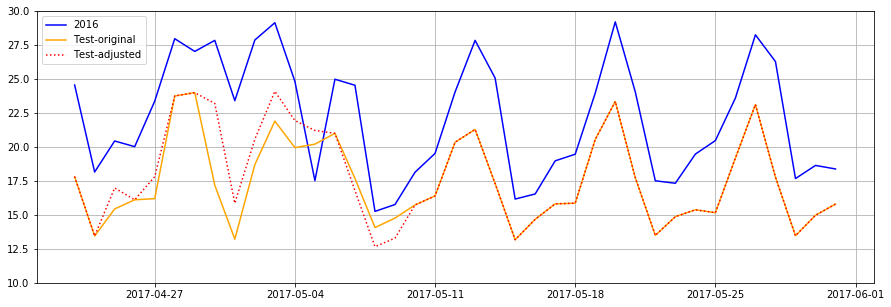

In [25]:
# 2016 Act vs 2017 Pred
pred = pd.DataFrame(sub.groupby(['visit_date'])['pred','visitors'].mean().reset_index()).rename(columns={'visitors':'pred_adj'})

train = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/air_visit_data.csv')[['visit_date','visitors']]
train['visit_date'] = pd.to_datetime(train['visit_date'])
train['visit_date'] = train['visit_date']+timedelta(days=365-1)
df = train[train.visit_date>=date(2017,4,23)]
df = df[df.visit_date<=date(2017,5,31)]
df = pd.DataFrame(df.groupby(['visit_date'])['visitors'].mean().reset_index())

df = df.merge(pred, on='visit_date', how='left')

fig = plt.figure(figsize=(15,5))
plt.plot(df.visit_date, df.visitors, "blue", label = "2016")
plt.plot(df.visit_date, df.pred, "orange", label = "Test-original")
plt.plot(df.visit_date, df.pred_adj, "red", label = "Test-adjusted", linestyle='dotted')
plt.ylim(10,30)
plt.legend(loc='upper left')
plt.grid()